In [2]:
# Imports
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def seed_all(seed=42):
    """
    Sets the numpy and torch random seed.
    """
    np.random.seed(seed)
    torch.random.seed = seed

seed_all()

In [4]:
# Create some X data
X = np.random.uniform(0, 10, 100)

In [5]:
# Define the slope (m), bias (b), and some noise we want to add to X to make y
m = 3
b = 1.8
noise = np.random.normal(scale=3, size=100)

# Exercise 2.1

Based on your knowledge of linear regression, please use the variables `X`, `m`, `b`, and `noise` to generate a new variable `y`.

<!-- startquestion -->

In [6]:
y = X*m + b + noise

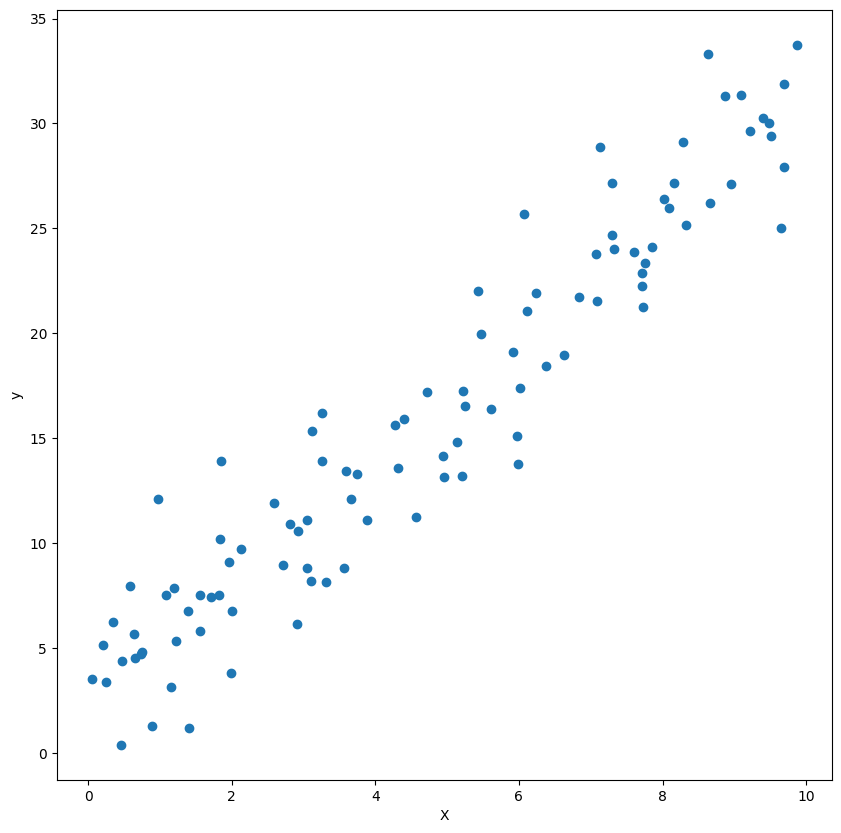

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)

# Exercise 2.2

Please complete the `mse` function below.
There is a sanity check implemented that shoudl let you know if you've implemented the function correctly.

<!-- startquestion -->

In [8]:
# Define MSE
def mse(predictions:torch.Tensor, actuals:torch.Tensor) -> torch.Tensor:
    yhats = predictions
    ys = actuals
    mse = ((yhats - ys)**2).mean()
    return mse
    raise NotImplementedError("Implement MSE, then remove this line")

In [9]:
ys = torch.tensor([1,2,3])
yhats = torch.tensor([1.1, 2.1, 3.1])

In [51]:
assert mse(ys, yhats) == 0.0100

AssertionError: 

In [11]:
print(mse(ys, yhats))
print(mse(ys, yhats).numpy())

tensor(0.0100)
0.009999989


In [52]:
assert torch.allclose(mse(ys, yhats), torch.tensor(0.01))

In [12]:
# Now that we've defined MSE, let's just use Torch's.
mse_loss = nn.MSELoss()
mse_loss(ys, yhats)

tensor(0.0100)

In [14]:
# We can also use the functional API to calculate MSE
F.mse_loss(ys, yhats)

tensor(0.0100)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exercise 2.3

In the exercise below, use the notebook to fit a `LinearRegression` model.
We will inspect the parameters (the coefficient and intercept), and calculate the mean squared error.
In the cells below, complete the exercise to determine the coefficient and intercept learned by a `LinearRegression`.

<!-- startquestion -->

In [16]:
# your code here
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)

LinearRegression()

In [17]:
# Display the slope and intercept
lr.coef_, lr.intercept_

(array([2.86206803]), np.float64(2.4452884726402466))

In [18]:
# Calculate the mean squared error
mean_squared_error(y, lr.predict(X.reshape(-1, 1)))

7.259261075703482

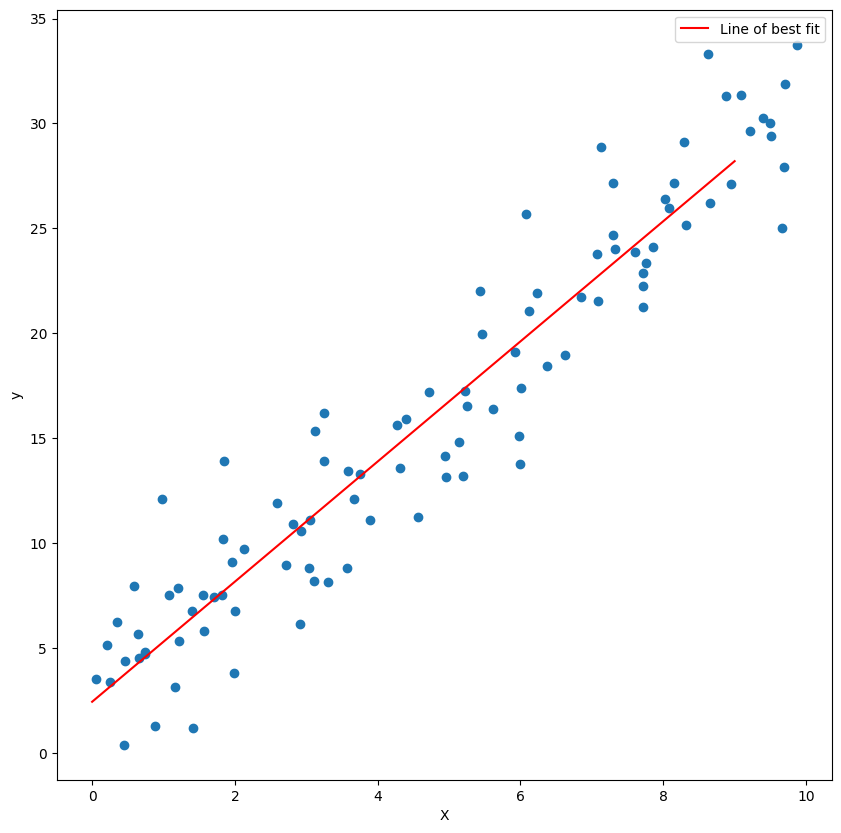

In [19]:
# Plot our line of best fit
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
_x = np.arange(0, 10)
_y = _x * lr.coef_[0] + lr.intercept_
ax.plot(_x, _y, c='red', label=f"Line of best fit")
ax.legend()

In [20]:
# Because we're in torch now, let's just turn X and y into tensors.
X = torch.tensor(X)
y = torch.tensor(y)

# Exercise 2.4

In the exercise below, complete the `forward` method.
What is the input `X`?
How should that be transformed to the output for a linear regression?

<!-- startquestion -->

In [21]:
# Build our linear regression model
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        # Randomly initialize 2 parameters, one for our slope and one for our bias.
        self.slope = nn.Parameter(torch.rand(1))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        return X * self.slope + self.bias

In [22]:
lr = LinReg()

In [23]:
N_EPOCHS = 1000 # number of times to run through dataset
LR = 1e-2 #learning rate - step size on the weight updates

In [24]:
# Initialize lists to store slopes, biases, losses, and alphas for visualization later
slopes = []
biases = []
losses = []
_alphas = []

# Loop over the number of epochs
for i in range(N_EPOCHS):
    # Generate predictions using the current model
    # .forward is not required since it inherits from nn.Module
    yhat = lr(X)

    # Compute the loss between the predictions and actual values
    # F functional library from PyTorch - pick other loss functions from the documentation
    loss = F.mse_loss(yhat, y)

    # Print the loss every 10% of the total epochs
    if i % (N_EPOCHS / 10) == 0:
        print(f"Epoch {i} Train Loss: {loss:.04f}")
        #:.04f round to 4th float (aka decimal)

    # Compute the gradients of the loss with respect to the model parameters
    loss.backward()

    # Update the model parameters using the computed gradients and the learning rate
    # Builds computational graph that figures out based on a certain loss, gradients
    # LR how much of the gradient we want to subtract
    # LR too small - takes forever to learn
    # LR too large - divergence - gets worse. Miss the optimal value. Giant overstepping the basin
    lr.slope.data.sub_(lr.slope.grad * LR)
    lr.bias.data.sub_(lr.bias.grad * LR)

    # Reset the gradients to zero for the next iteration
    lr.slope.grad.zero_()
    lr.bias.grad.zero_()

    # Store the current parameters and loss for visualization later
    slopes.append(float(lr.slope.data.detach().numpy()))
    biases.append(float(lr.bias.data.detach().numpy()))
    losses.append(float(loss.detach().numpy()))
    _alphas.append(i / N_EPOCHS)

Epoch 0 Train Loss: 269.5825
Epoch 100 Train Loss: 7.4634
Epoch 200 Train Loss: 7.3264
Epoch 300 Train Loss: 7.2813


/tmp/ipython-input-24-2478317927.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slopes.append(float(lr.slope.data.detach().numpy()))
/tmp/ipython-input-24-2478317927.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  biases.append(float(lr.bias.data.detach().numpy()))


Epoch 400 Train Loss: 7.2665
Epoch 500 Train Loss: 7.2616
Epoch 600 Train Loss: 7.2600
Epoch 700 Train Loss: 7.2595
Epoch 800 Train Loss: 7.2593
Epoch 900 Train Loss: 7.2593


In [25]:
lr.slope, lr.bias

(Parameter containing:
 tensor([2.8629], requires_grad=True),
 Parameter containing:
 tensor([2.4396], requires_grad=True))

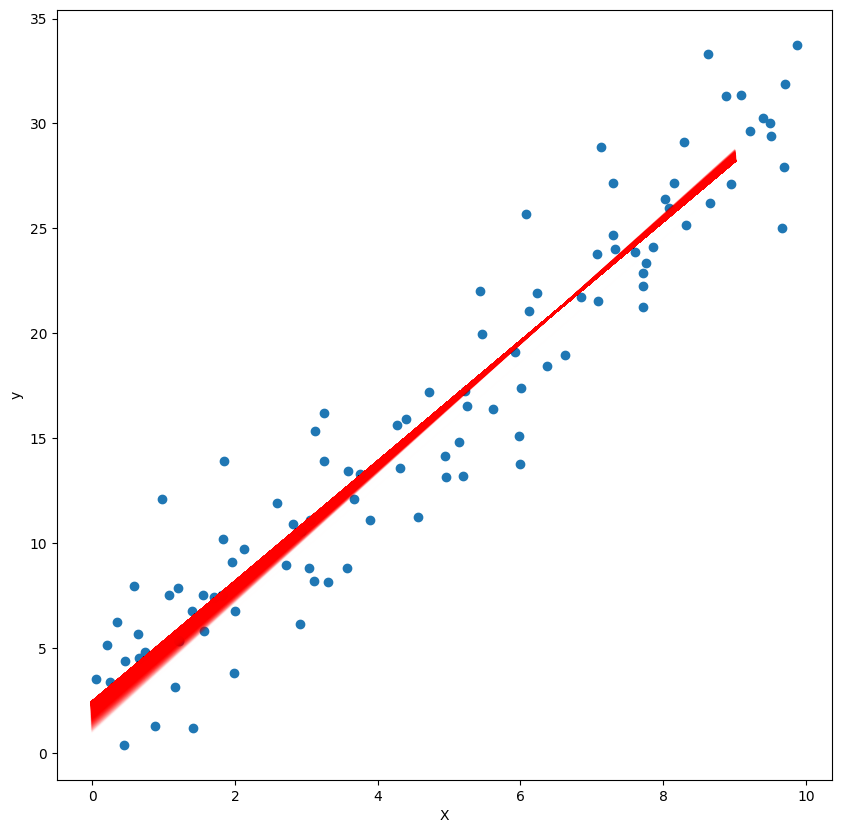

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X, y)
for s, b, a in zip(slopes, biases, _alphas):
    _x = np.arange(0, 10)
    _y = _x * s + b
    ax.plot(_x, _y, alpha=a, c='red', label=f"Epoch {int(a)}")


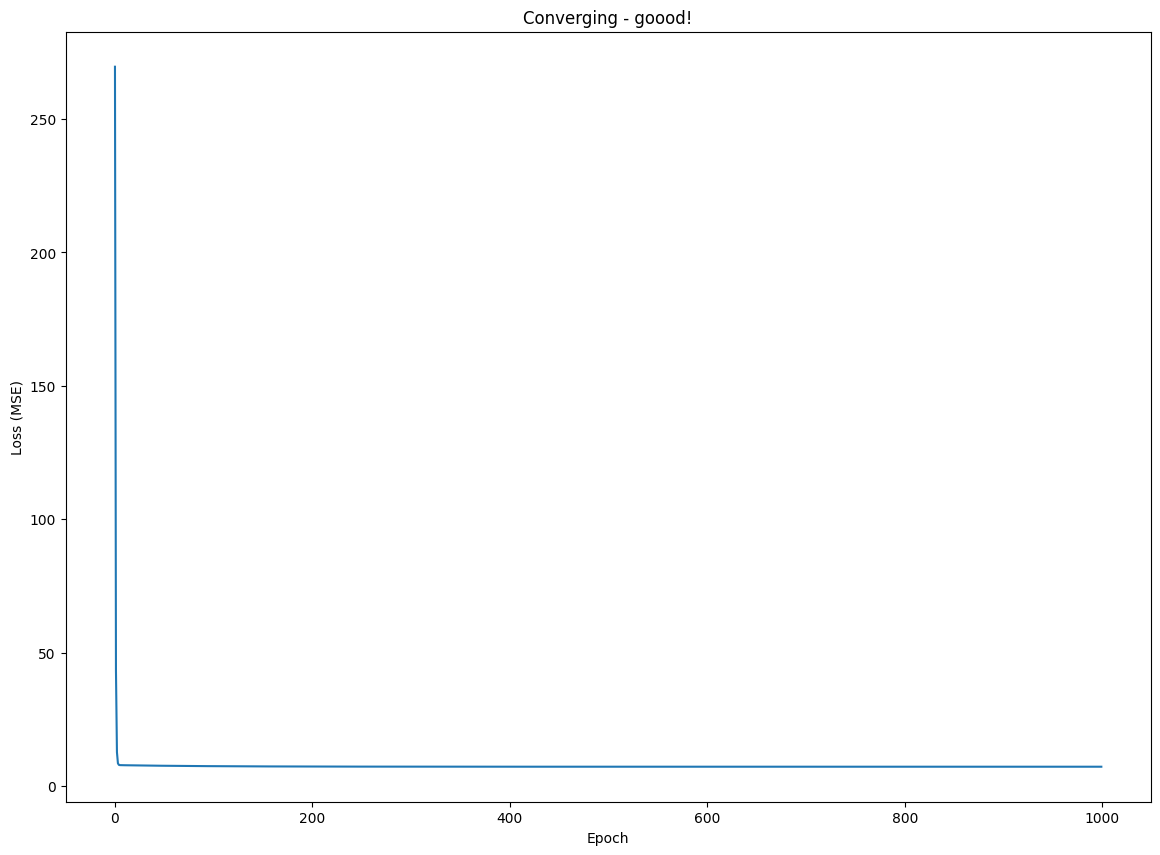

In [27]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
if (losses[-1] > losses[0]) | np.isnan(losses[-1]):
    ax.set_title('Diverging - BAD!')
else:
    ax.set_title('Converging - goood!')

# Exercise 2.5

Change the learning rate and number of epochs, then re-run the code up to this point, making sure to re-instantiate your model every time.
What do you notice?
What happens if you make the learning rate too large or too small?

<!-- startquestion -->

In [28]:
# Go back and re-run the code with different hyperparameters.

In [29]:
# Make yet another fake dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=3, n_informative=2, bias=3, noise=2)

In [30]:
# No more bad habits, we need to split our data.
X_train, X_valid, y_train, y_valid = (torch.tensor(i).float() for i in train_test_split(X, y, test_size=0.1, random_state=42))

# Exercise 2.6

Complete the exercise below to create a few `nn.Parameter`s for our weights and bias.
The `weights` parameter should have the same number of elements as `X_train` has columns, and the `bias` parameter should just be a single value.
Use `torch.rand` to generate random numbers to populate the parameters.

<!-- startquestion -->

In [31]:
# Let's create some temporary weights and biases and test out our matrix operations before we build our model.
# Create a weights parameter with 1 beta per column in X
weights = torch.rand(X_train.shape[1])
# Create our bias parameter
bias = torch.rand(1)

In [32]:
# Test out the operation we want to perform in the forward pass
torch.matmul(X_train[:10], weights) + bias

tensor([ 0.1668, -0.3357,  0.2847,  0.2536,  0.1767, -0.4498,  0.6695,  0.5762,
         1.3303,  1.2340])

In [33]:
# FYI: @ does the same thing as matmul in this context and is easier
X_train[:10]@weights + bias

tensor([ 0.1668, -0.3357,  0.2847,  0.2536,  0.1767, -0.4498,  0.6695,  0.5762,
         1.3303,  1.2340])

In [34]:
# Sanity check: different implementations of our forward pass are the same
assert (X_train@weights + bias == torch.matmul(X_train, weights) + bias).all()

In [35]:
# Let's make our model
class LinRegMulti(nn.Module):
    def __init__(self, n_cols):
        super().__init__()
        self.n_cols = n_cols
        # weight for each column (feature)
        self.weights = nn.Parameter(torch.rand(self.n_cols))
        self.bias = nn.Parameter(torch.rand(1))

    def forward(self, X):
        return X@self.weights.T + self.bias

In [36]:
N_EPOCHS = 10000
LR = 1e-3

In [37]:
lrm = LinRegMulti(X_train.shape[1])

In [38]:
# Instead of updating each parameter individually, let's make an update rule function.
def gd_update_rule(parameters, lr):
    parameters.data.sub_(parameters.grad * lr)
    parameters.grad.zero_()

In [39]:
train_losses = []
valid_losses = []

In [40]:
for i in range(N_EPOCHS):
    yhat = lrm(X_train)
    loss = mse(yhat, y_train)
    loss.backward()
    for p in lrm.parameters():
        gd_update_rule(p, LR)
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = lrm(X_valid)
        valid_loss = mse(yhat, y_valid)
        valid_losses.append(valid_loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train Loss: {loss:.04f}, Valid Loss: {valid_loss:.04f}")

/tmp/ipython-input-35-384595919.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  return X@self.weights.T + self.bias


Epoch 0 Train Loss: 2072.2314, Valid Loss: 2509.6663
Epoch 1000 Train Loss: 53.7979, Valid Loss: 65.4493
Epoch 2000 Train Loss: 5.3779, Valid Loss: 5.9843
Epoch 3000 Train Loss: 4.1695, Valid Loss: 4.2613
Epoch 4000 Train Loss: 4.1385, Valid Loss: 4.1796
Epoch 5000 Train Loss: 4.1377, Valid Loss: 4.1720
Epoch 6000 Train Loss: 4.1377, Valid Loss: 4.1711
Epoch 7000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 8000 Train Loss: 4.1377, Valid Loss: 4.1712
Epoch 9000 Train Loss: 4.1377, Valid Loss: 4.1712


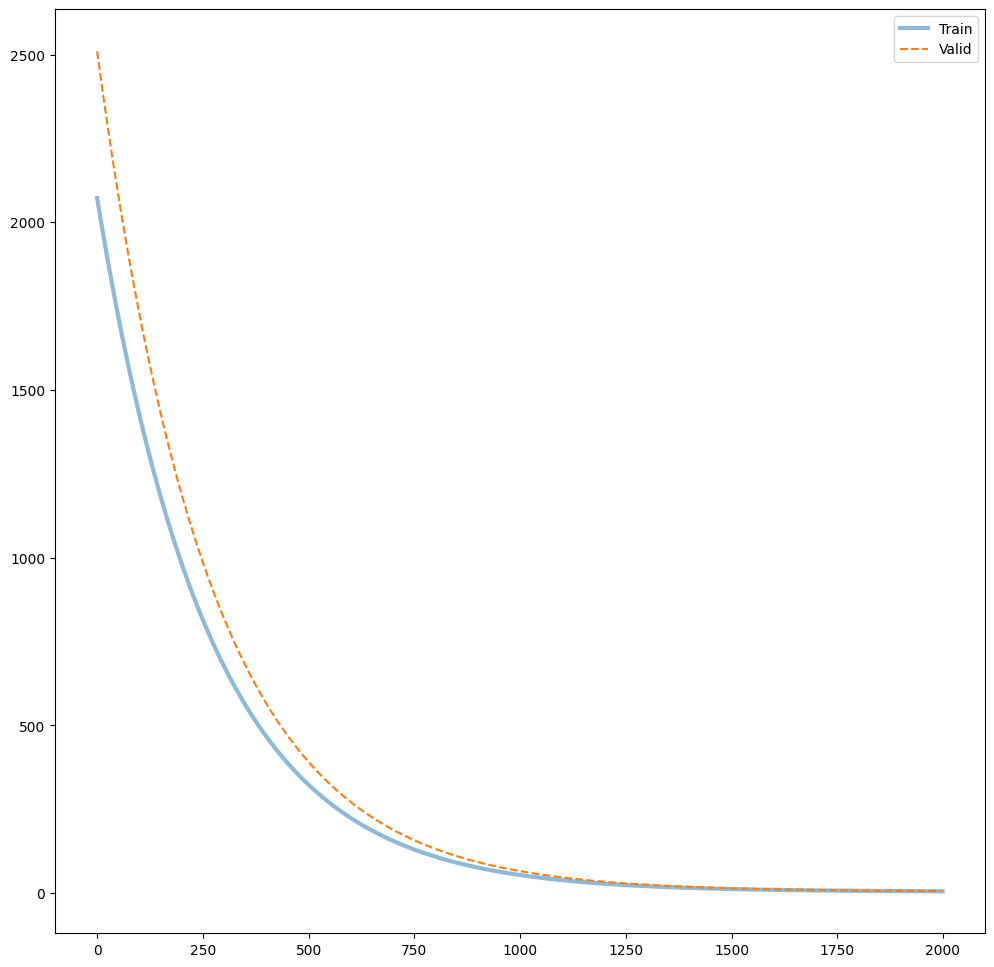

In [41]:
EPOCHS_TO_SHOW = 2000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:EPOCHS_TO_SHOW], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:EPOCHS_TO_SHOW], ls='--', label='Valid')
ax.legend()

In [42]:
lrm.weights

Parameter containing:
tensor([2.7642e-02, 4.1119e+01, 2.4042e+01], requires_grad=True)

In [43]:
lrm.bias

Parameter containing:
tensor([2.9828], requires_grad=True)

In [44]:
class Linear(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.weights = nn.Parameter(torch.rand((dim_in, dim_out)))
        self.bias = nn.Parameter(torch.rand(dim_out))

    def forward(self, X):

        return X@self.weights + self.bias

In [ ]:
# Let's compare our Linear class with nn.Linear
l1 = Linear(3, 5)
l2 = nn.Linear(3, 5)

In [ ]:
l2.weight

In [ ]:
l1.weights

In [ ]:
# We need to make sure the weights have the same values.
# If they don't, we won't be able to compare the output.
# I'm not sure why the Linear layer's weights are transposed,
# but we'll see it doesn't matter.
l1.weights.data.copy_(l2.weight.T)
l1.bias.data.copy_(l2.bias)

In [ ]:
l1(X_train[:5])

In [ ]:
l2(X_train[:5])

In [ ]:
assert (l1(X_train[:5]) == l2(X_train[:5])).all()

In [ ]:
%%timeit
l1(X_train[:5])

In [ ]:
%%timeit
 l2(X_train[:5])

In [ ]:
rng = torch.arange(-5, 5.01, 0.05)
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(rng, F.relu(rng), label='ReLU')
ax.plot(rng, torch.tanh(rng), label='tanh')
ax.plot(rng, torch.sigmoid(rng), label='sigmoid')
ax.plot(rng, F.leaky_relu(rng, negative_slope=0.01), ls='--', label='leaky ReLU')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Common activation functions')
ax.legend()

In [ ]:
class MultiLayerRegressor(nn.Module):
    def __init__(self, dim_in, hidden_dim):
        super().__init__()
        # self.first_layer = Linear(dim_in, hidden_dim)
        self.first_layer = nn.Linear(dim_in, hidden_dim)
        # self.second_layer = Linear(hidden_dim, 1)
        self.second_layer = nn.Linear(hidden_dim, 1)

    def forward(self, X):
        x = self.first_layer(X)
        # x = relu(x)
        x = F.relu(x)
        x = self.second_layer(x)
        return x

In [ ]:
def multilayer_regressor(in_dim, hidden_dim):
    return nn.Sequential(
        nn.Linear(in_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, 1)
    )

In [ ]:
# mlr = MultiLayerRegressor(3, 4)
mlr = multilayer_regressor(3, 4)

In [ ]:
train_losses = []
valid_losses = []

In [ ]:
LR = 1e-3
N_EPOCHS = 20000

In [ ]:
# Notice that instead of iterating through our parameters and applying
# an update rule, we're just using torch's built in SGD optimizer.
opt = optim.SGD(mlr.parameters(), lr=LR)

In [ ]:
for i in range(N_EPOCHS):
    yhat = mlr(X_train).squeeze()
    loss = F.mse_loss(yhat, y_train)
    loss.backward()
    opt.step()
    opt.zero_grad()
    train_losses.append(loss.detach().numpy())

    with torch.no_grad():
        yhat = mlr(X_valid).squeeze()
        valid_loss = F.mse_loss(yhat, y_valid)
        valid_losses.append(loss.numpy())

    if i%(N_EPOCHS/10) == 0:
        print(f"Epoch {i} Train loss: {loss:.04f}, Valid loss: {valid_loss:.04f}")

In [ ]:
idx=10000
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(train_losses[:idx], label='Train', linewidth=3, alpha=0.5)
ax.plot(valid_losses[:idx], ls='--', label='Valid')
ax.legend()

In [ ]:
# Modify the code above to complete the exercise